___

<a href='https://mainacademy.ua/'> <img src='https://mainacademy.ua/wp-content/uploads/2019/03/logo-main.png' alt = 'Хмм, щось з інтернетом'/></a>
___

# Module 7: Supervised learning

## Lab work 7



#### Мета: 

* навчитися використовувати моделі з учителем

### Завдання 1:

Для цього завдання ми будемо вивчати загальнодоступні дані з [LendingClub.com](www.lendingclub.com). 

Кредитний клуб пов'язує людей, яким потрібні гроші (позичальники), та людей, які мають гроші (інвесторів). Сподіваємось, як інвестор ви хотіли б інвестувати в людей, які продемонстрували, що вони мають високу ймовірність повернути вам гроші. Ми спробуємо створити модель, яка допоможе це передбачити.

Кредитний клуб мав [дуже цікавий 2016 рік](https://en.wikipedia.org/wiki/Lending_Club#2016), тож давайте перевіримо деякі їх дані.

Ми використовуватимемо дані про позики за 2007-2010 роки та намагатимемося класифікувати та прогнозувати, чи повертав позичальник їх повністю.

Ось що представляють стовпці:
* `credit.policy`: 1, якщо клієнт відповідає критеріям андеррайтингу кредитів LendingClub.com, і 0 в іншому випадку.

* `purpose`: мета позики (приймає значення "кредитна_карта", "консолідація боргу", "освітня", "основна_покупка", "малий бізнес" та "всі_інші").

* `int.rate`: процентна ставка позики, пропорційно (ставка 11% зберігатиметься як 0,11). Позичальникам, які LendingClub.com вважає більш ризикованими, призначаються вищі процентні ставки.

* `installment`: щомісячні виплати позичальника, якщо позика фінансується.

* `log.annual.inc`: журнал річного доходу позичальника, який самостійно звітується.

* `dti`: відношення боргу до доходу позичальника (сума боргу, поділена на річний дохід).

* `fico`: кредитний рейтинг позичальника FICO.

* `days.with.cr.line`: кількість днів, коли позичальник мав кредитну лінію.

* `revol.bal`: кредитний залишок позичальника (сума не виплачена в кінці циклу виставлення рахунків за кредитною карткою).

* `revol.util`: коефіцієнт використання кридитної лінії позичальника (сума використаної кредитної лінії відносно загальної кількості доступних кредитів).

* `inq.last.6mths`: кількість запитів позичальників з боку кредиторів за останні 6 місяців.

* `delinq.2yrs`: кількість разів, протягом яких позичальник прострочував платежі протягом останніх 2 років понад 30 днів.

* `pub.rec`: кількість публічних записів (заяви про банкрутство, податкова застава або рішення).

Алгоритм виконання та проміжні завдання:
1. Відкрийте файл та виведіть описову статистику

2. Створіть дві гістограми по полю fico (перша для значень not.fully.paid=0, друга = 1). Гістограми накладіть одна на одну.

3. Відобразіть тенденцію між оцінкою fico та int.rate. Використайте jointplot

4. Побудуйте графік lmplot на основі int.rate та fico. Коліром розідліть по полю credit.policy. Розбийте по значеннях цільової функції

5. purpose є категорієї, тому варто перетворити за допомогою pd.get_dummies

6. Розбийте датасет на тестві та трейнові дані

7. Використайте для задачі класифікації такі моделі: дерево рішень, логістична регресія, random forest, XGBoost

8. Для кожної з моделей виведіть матрицю, основні метрики

8. *Використейте бібіотеку dtreeviz для візуалізації (там, де актуально)

9. Використайте ансамбель voting для всіх моделей

10. Порівняйте результати моделей та зробіть висновки

In [141]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import dtreeviz
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df = pd.read_csv('loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


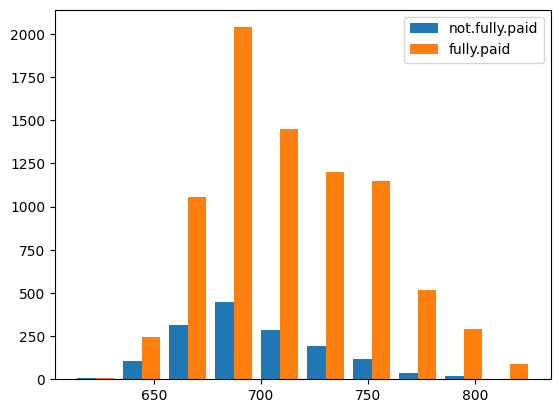

In [17]:

x1 = df.loc[df['not.fully.paid'] > 0, 'fico']
x2 = df.loc[df['not.fully.paid'] == 0, 'fico']

plt.hist([x1, x2], label=['not.fully.paid', 'fully.paid'])
plt.legend(loc='upper right')

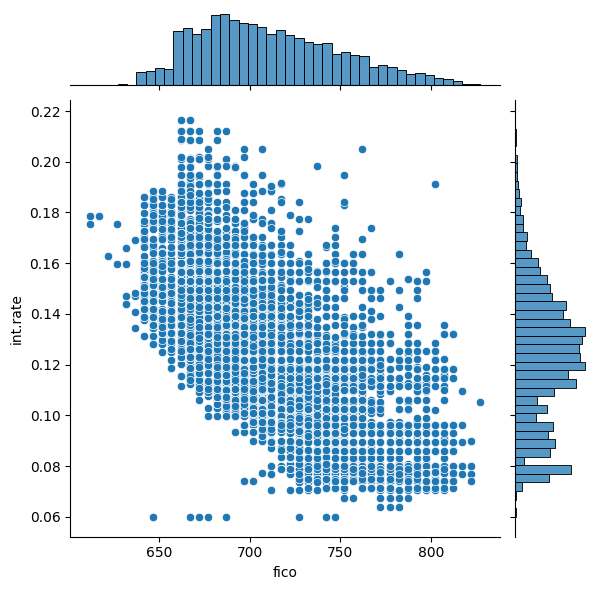

In [18]:

sns.jointplot(x='fico', y='int.rate', data=df)

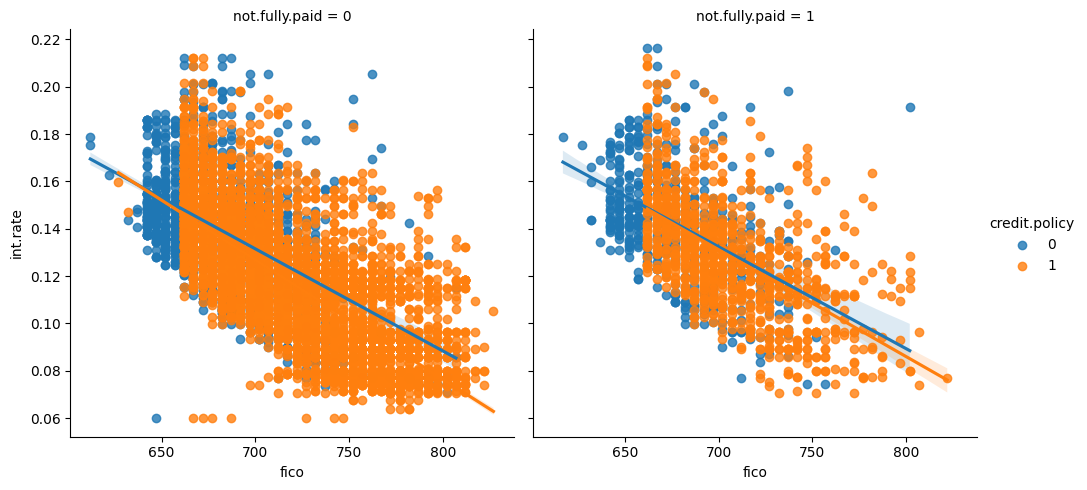

In [19]:
#  Побудуйте графік lmplot на основі int.rate та fico. Коліром розідліть по полю credit.policy. Розбийте по значеннях цільової функції

sns.lmplot(x='fico', y='int.rate', data=df, hue='credit.policy', col='not.fully.paid')

In [43]:
df = pd.get_dummies(df, columns=['purpose'], drop_first=True)

In [85]:
# 8. *Використейте бібіотеку dtreeviz для візуалізації (там, де актуально)

# 9. Використайте ансамбель voting для всіх моделей

# 10. Порівняйте результати моделей та зробіть висновки
# df = df['debt_consolidation'].astype(float)

X = df.drop('not.fully.paid', axis=1)
y = df['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)

In [143]:
linear_reg = LinearRegression().fit(X_train, y_train)

print(f'score test: {linear_reg.score(X_test, y_test)}')
pd.DataFrame(linear_reg.coef_, 
             X.columns, 
             columns=['coef']).sort_values(by='coef', ascending=False)


score test: 0.05650465887711953


,coef
purpose_small_business,1.196838e-01
int.rate,7.916848e-02
pub.rec,4.357037e-02
purpose_home_improvement,1.625841e-02
purpose_educational,1.341690e-02
inq.last.6mths,1.310629e-02
revol.util,3.089072e-04
installment,1.299854e-04
days.with.cr.line,2.454077e-06
revol.bal,4.307486e-07


In [152]:
dec_tree = DecisionTreeClassifier().fit(X_train, y_train)

print(f'decision tree score test: {dec_tree.score(X_test, y_test)}')
coefs = pd.DataFrame(dec_tree.feature_importances_, 
             X.columns, 
             columns=['coef']).sort_values(by='coef', ascending=False)
# print(coefs)
y_pred_test = dec_tree.predict(X_test)
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

decision tree score test: 0.7286012526096033
[[1661  357]
 [ 293   84]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2018
           1       0.19      0.22      0.21       377

    accuracy                           0.73      2395
   macro avg       0.52      0.52      0.52      2395
weighted avg       0.75      0.73      0.74      2395



In [153]:
random_forest = RandomForestClassifier(max_depth=5).fit(X_train, y_train)

print(f'random forest score test: {random_forest.score(X_test, y_test)}')
pd.DataFrame(random_forest.feature_importances_, 
             X.columns, 
             columns=['coef']).sort_values(by='coef', ascending=False)

y_pred_test = random_forest.predict(X_test)
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

random forest score test: 0.84258872651357
[[2018    0]
 [ 377    0]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2018
           1       0.00      0.00      0.00       377

    accuracy                           0.84      2395
   macro avg       0.42      0.50      0.46      2395
weighted avg       0.71      0.84      0.77      2395



/Users/admin/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/Users/admin/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/Users/admin/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [134]:
bst = XGBClassifier(n_estimators=2, max_depth=6, learning_rate=1, objective='binary:logistic')
# fit model
bst.fit(X_train, y_train)

y_pred = bst.predict(X_test)

print(bst.score(X_test, y_test))
pd.DataFrame(bst.feature_importances_, 
             X.columns, 
             columns=['coef']).sort_values(by='coef', ascending=False)

0.830062630480167


,coef
credit.policy,0.319850
purpose_small_business,0.116055
fico,0.083675
inq.last.6mths,0.060446
purpose_home_improvement,0.052093
purpose_credit_card,0.046252
pub.rec,0.043271
revol.util,0.038893
delinq.2yrs,0.037066
int.rate,0.036792


In [154]:
viz_model = dtreeviz.model(dec_tree,
                           X_train=X, y_train=y,
                           feature_names=X.columns,
                           target_name='loans')

v = viz_model.view()     # render as SVG into internal object 
v.show()                 # pop up window
v.save("./loans_decision_tree.svg")  # optionally save as svg

/Users/admin/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


### Завдання 2:

Просте завдання на обробку часових рядів.

Потрібно вивести наступну інформацію: 
1. Виведіть список унікальних міст з датасету
2. Виведіть дату початку та кінця ведення даних
3. Яка середня конценрація $NO_2$ для кожного дня тижня і міста (виведіть таблицю)?
4. Яке середнє значення для кожної години (виведіть стовбчикову діаграму)?

In [7]:
url = "https://raw.githubusercontent.com/dm-fedorov/pandas_basic/master/%D0%B1%D1%8B%D1%81%D1%82%D1%80%D0%BE%D0%B5%20%D0%B2%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%B2%20pandas/data/air_quality_no2_long.csv"

Uniq cities:  ['Paris' 'Antwerpen' 'London']
Date start:  2019-05-07 01:00:00+00:00
Date end:  2019-06-21 00:00:00+00:00
          city day_of_week        date      value
0    Antwerpen      Friday  2019-05-10  11.000000
1    Antwerpen      Friday  2019-05-24  74.500000
2    Antwerpen      Friday  2019-05-31   9.000000
3    Antwerpen      Friday  2019-06-14  36.500000
4    Antwerpen      Monday  2019-05-13  14.500000
..         ...         ...         ...        ...
118      Paris   Wednesday  2019-05-22  43.054167
119      Paris   Wednesday  2019-05-29  23.958333
120      Paris   Wednesday  2019-06-05  34.829167
121      Paris   Wednesday  2019-06-12  27.525000
122      Paris   Wednesday  2019-06-19  26.950000

[123 rows x 4 columns]


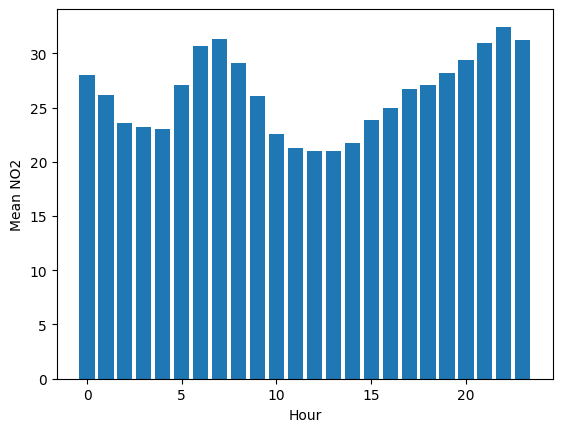

In [156]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('air_quality_n2.csv')

unique_cities = df['city'].unique()
print("Uniq cities: ", unique_cities)

start_date = df['date.utc'].min()
end_date = df['date.utc'].max()
print("Date start: ", start_date)
print("Date end: ", end_date)

df['date'] = pd.to_datetime(df['date.utc']).dt.date
df['day_of_week'] = pd.to_datetime(df['date.utc']).dt.day_name()
result = df.groupby(['city', 'day_of_week', 'date'])['value'].mean().reset_index()
print(result)

df['hour'] = pd.to_datetime(df['date.utc']).dt.hour
hourly_mean = df.groupby('hour')['value'].mean().reset_index()
plt.bar(hourly_mean['hour'], hourly_mean['value'])
plt.xlabel('Hour')
plt.ylabel('Mean NO2')
plt.show()
